## GET 요청

In [1]:
import requests

In [2]:
# 단순 GET 요청
response = requests.get("http://news.naver.com/main/home.nhn")

In [3]:
response

<Response [200]>

In [4]:
response.status_code

200

In [5]:
response.headers

{'Date': 'Tue, 19 Sep 2017 02:20:57 GMT', 'Server': 'Apache', 'Set-Cookie': 'page_uid=TNt/udpy8PNssmTJqaRssssssth-089498; path=/; domain=.naver.com, _naver_usersession_=DE0DyGBoWM6AfZB9bTYUxA==; path=/; max-age=300; domain=.naver.com, JSESSIONID=043A29FC11E781BCBE4C346D88F117C2; Path=/main/; HttpOnly', 'Cache-Control': 'no-cache', 'Expires': 'Thu, 01 Jan 1970 00:00:00 GMT', 'Content-Language': 'ko-KR', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Connection': 'close', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/html;charset=EUC-KR'}

In [6]:
html = response.text
html

'<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n<meta charset="euc-kr">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta http-equiv="refresh" content="600" />\n<meta name="viewport" content="width=1023" />\n\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n\r\n<meta property="og:title"       content="네이버 뉴스">\r\n<meta property="og:type"        content="website">\r\n<meta property="og:url"         content="http://news.naver.com/main/home.nhn">\r\n<meta property="og:image"       content="http://static.news.naver.net/image/news/ogtag/navernews_200x200_20160804.png"/>\r\n<meta property="og:description" content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공">\r\n\r\n<meta name="twitter:card"\t\tcontent="summary">\r\n<meta name="twitter:title"\t\tcontent="네이버 뉴스">\r\n<meta name="twitter:site"       content="네이버 뉴스">\r\n<meta name="twitter:creator"    content="네이버 뉴스">\r\n<meta name="twitter

In [9]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
# soup.select('a[href*=sectionList.nhn]')  # href속성에 sectionList.nhn을 포함하고 있는 a태그들을 찾음.
for tag in soup.select('a[href*=sectionList.nhn]'):
#     print(tag.text)
    print(tag.text.strip())

상식in뉴스
지구촌 화제
뉴스, 이제 영어로 듣자!


북한 잇따른 도발

'사드 배치' 계속되는 논란

'살충제 계란' 파동

'박근혜·최순실' 재판

KBS·MBC 총파업

부동산 시장 리포트

美 '트럼프 시대'

한일 '위안부 협상' 타결 이후

세월호 인양 그 후

뉴욕 스키니 아파트 신드롬-다주택자 투기..
불공정 선거 보도 기사 모음


### GET 요청 시에 커스텀 헤더 지정

In [10]:
request_headers = {
    'User-Agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 '
                   '(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'),
    'Referer': 'http://news.naver.com/main/home.nhn', # 뉴스홈
}

response = requests.get("http://news.naver.com/main/main.nhn", headers=request_headers)

In [11]:
response

<Response [200]>

### GET 요청 시에 GET인자 지정
- params 인자로 dict 지정: 동일 Key의 인자를 다수 지정 불가 _(∵ 파이썬 사전에서 동일 Key 값 지정 => 덮어쓰기)_
- params 인자로 (key, value) 형식의 tuple 지정: 동일 Key의 인자를 다수 지정 가능

In [20]:
# 동일 Key의 GET인자 지정

# get_params = dict([('k1', 'v1'), ('k1', 'v3'), ('k2', 'v2')])  # {'k1': 'v3', 'k2': 'v2'}
get_params = (('k1', 'v1'), ('k1', 'v3'), ('k2', 'v2'))
response = requests.get('http://httpbin.org/get', params=get_params)

In [21]:
response.text

'{\n  "args": {\n    "k1": [\n      "v1", \n      "v3"\n    ], \n    "k2": "v2"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Connection": "close", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.14.2"\n  }, \n  "origin": "175.124.111.85", \n  "url": "http://httpbin.org/get?k1=v1&k1=v3&k2=v2"\n}\n'

In [22]:
response.json()

{'args': {'k1': ['v1', 'v3'], 'k2': 'v2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.14.2'},
 'origin': '175.124.111.85',
 'url': 'http://httpbin.org/get?k1=v1&k1=v3&k2=v2'}

In [36]:
response.json()['args']  # deserialize

{'k1': ['v1', 'v3'], 'k2': 'v2'}

### 상태 코드

In [23]:
response.status_code

200

In [24]:
response.ok  # status_code가 200이상 400미만의 값인지 여부 (bool)

True

### 응답 헤더
- dict 타입이 아니라 requests.structures.CaseInsensitiveDict 타입
    - Key문자열의 대소문자를 가리지 않습니다.

In [25]:
response.headers

{'Connection': 'keep-alive', 'Server': 'meinheld/0.6.1', 'Date': 'Tue, 19 Sep 2017 02:37:54 GMT', 'Content-Type': 'application/json', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'X-Powered-By': 'Flask', 'X-Processed-Time': '0.000751972198486', 'Content-Length': '347', 'Via': '1.1 vegur'}

In [27]:
response.headers.__class__  # 사전과 유사하지만 dict타입은 아님. (CaseInsensitiveDict타입은 Key문자열의 대소문자를 구별하지 않습니다.)

requests.structures.CaseInsensitiveDict

- 각 헤더의 값은 헤더이름을 Key로 접근하여 획득

In [28]:
response.headers['Content-Type']

'application/json'

In [29]:
response.headers['content-type']  # Key문자열 대소문자에 상관없이 접근

'application/json'

- response.encoding 값은 Content-Type헤더의 charset값으로 획득

In [31]:
print(response.encoding)  # (charset값이 없으면 None 출력)

None


In [33]:
r = requests.get("http://news.naver.com/main/home.nhn")
r.headers['Content-Type']

'text/html;charset=EUC-KR'

In [34]:
r.encoding

'EUC-KR'

### 응답 body

- 이미지 데이터일 경우에는 .content 만 사용

- 문자열 데이터일 경우에는 .text 를 사용

- 응답문자열이 json 포맷일 경우
    - json.loads(응답문자열)을 통해 직접 Deserialize를 수행
    - 혹은 .json()함수를 통해 Deserialize를 수행
    - 응답문자열이 json포맷이 아닐경우 JSONDecodeError 예외 발생

### 한글이 깨진 것처럼 보여질 경우
- charset정보가 없는 경우,
- 이 때는 직접 인코딩을 지정한 후에 .text에 접근해주세요.

- 혹은 .content를 직접 디코딩하실 수도 있습니다. (위 방법을 선호)

## _("GET 요청에 대해서만 잘 알아도 크롤링하시는 데에는 전혀 지장이 없습니다.")_

---

## POST 요청
- data 인자로 dict지정: 동일 Key의 인자를 다수 지정 불가
- data 인자로 (key, value) 형식의 tuple 지정: 동일 Key의 인자를 다수 지정 가능

※ 동시에 커스텀 헤더 및 GET인자 지정도 가능

In [42]:
# data = {'k1': 'v1', 'k2': 'v2'}
data = (('k1', 'v1'), ('k1', 'v3'), ('k2', 'v2'))
response = requests.post('http://httpbin.org/post', data=data)

In [43]:
response

<Response [200]>

In [44]:
response.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'k1': ['v1', 'v3'], 'k2': 'v2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Content-Length': '17',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.14.2'},
 'json': None,
 'origin': '175.124.111.85',
 'url': 'http://httpbin.org/post'}

### JSON POST 요청

In [57]:
# JSON 인코딩

import json

json_data = {'k1': 'v2', 'k2': [1, 2, 3], 'name': 'Ask장고'}

In [59]:
# json포맷 문자열로 변환한 후, data인자로 지정

json_string = json.dumps(json_data)
response = requests.post('http://httpbin.org/post', data=json_string)

In [60]:
response.json()

{'args': {},
 'data': '{"k1": "v2", "k2": [1, 2, 3], "name": "Ask\\uc7a5\\uace0"}',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Content-Length': '56',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.14.2'},
 'json': {'k1': 'v2', 'k2': [1, 2, 3], 'name': 'Ask장고'},
 'origin': '175.124.111.85',
 'url': 'http://httpbin.org/post'}

In [61]:
# 객체를 json인자로 지정하면, 내부적으로 json.dumps 처리

response = requests.post('http://httpbin.org/post', json=json_data)

In [62]:
response.json()

{'args': {},
 'data': '{"k1": "v2", "k2": [1, 2, 3], "name": "Ask\\uc7a5\\uace0"}',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Content-Length': '56',
  'Content-Type': 'application/json',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.14.2'},
 'json': {'k1': 'v2', 'k2': [1, 2, 3], 'name': 'Ask장고'},
 'origin': '175.124.111.85',
 'url': 'http://httpbin.org/post'}

### 파일 업로드 요청

In [63]:
# multipart/form-data 인코딩

files = {
    'photo1': open('f1.jpeg', 'rb'),  # 데이터만 전송
    'photo2': open('f2.jpg', 'rb'),
    'photo3': ('f3.jpg', open('f3.jpg', 'rb'), 'image/jpeg', {'Expires': '0'}),  # 구체적으로 명시
}

post_params = {'k1': 'v1'}

response = requests.post('http://httpbin.org/post', files=files, data=post_params)

{'args': {},
 'data': '',
 'files': {'photo1': 'data:application/octet-stream;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxIQERUQEBIVFRIXFRYVGBUXGBcWGBYXGBsWFxYaGRUYHiggGB0lGxYXITEhJSkrLi4uFx8zODMsQyguLi0BCgoKDg0OGxAQGy0lICUvLS0tLy0tLS4tLy8tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAN8A4gMBEQACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABQYDBAcCAQj/xABJEAACAQMCAgYGBQgHCAMBAAABAgMABBESIQUxBhMiQVFhBxQyQnGBM1JygpEVI1NikqGiwTRDVGNzk8IkZIOjsbLR4USU1Bb/xAAbAQEAAgMBAQAAAAAAAAAAAAAAAwUCBAYBB//EADkRAAIBAwIEAwcCBgEEAwAAAAABAgMEESExBRJBURNhcSIygZGhsdEGwRQjQlLh8PEkM2JyFRY0/9oADAMBAAIRAxEAPwDb9OnSPiXD7m3e0uHit5IiMKFIMqMSxJIPusm3kfOgKhwb038ThIE4iuF79SaHx5NHgD5qaA6f0U9MFleqeuSS2ZdOtmBeFS2cZmUYUbHdwo2rxySaTe57hnQoJ0kUPGysjDKspDKR4gjYivTwyUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUAoBQCgFAKAUBUvSh0X/KfD5IVGZk/Ow/4i57P3gSv3ge6gPyW6kEgggjYg7EH4UB1P0DSDrbpD3xxnHkGYf6q579Qr+XCS6N/Y27Tdo6V+Q2gYy8OlNrITlkA1W8h2zrt84BOPaTS3marLPjVaj7NT2l9fmT1LaMtVoS3COmg6xbbiEYtbhsBG1arec8sRTHHa/UYBtxjNdVa3lK5jzU38OqNCdOUHqW6tow
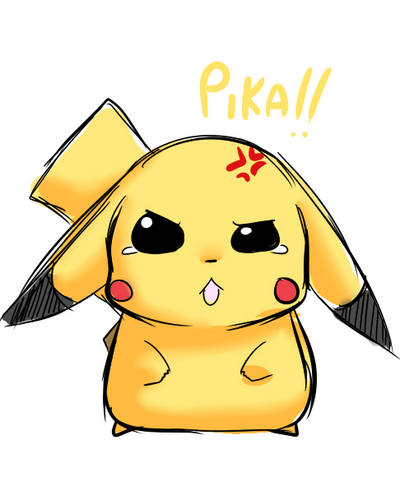

In [64]:
response.json()